In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%pip install -q opendatasets
#import opendatasets as od
import os

#od.download('https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small',data_dir="dataset")

In [8]:
df = pd.read_csv('/kaggle/input/fashion-product-images-small/styles.csv', on_bad_lines='warn')
df.head()

/tmp/ipykernel_34/1530052267.py:1: ParserWarning: Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 33020: expected 10 fields, saw 11
Skipping line 35748: expected 10 fields, saw 11
Skipping line 35962: expected 10 fields, saw 11
Skipping line 37770: expected 10 fields, saw 11
Skipping line 38105: expected 10 fields, sa

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

In [9]:
df.nunique()

id                    44424
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
year                     13
usage                     8
productDisplayName    31121
dtype: int64

In [10]:
df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df[['gender']].value_counts().sort_index()

gender
Boys        830
Girls       655
Men       22109
Unisex     2126
Women     18357
Name: count, dtype: int64

In [13]:
df[['masterCategory']].value_counts().sort_index()

masterCategory
Accessories       11244
Apparel           21366
Footwear           9197
Free Items          105
Home                  1
Personal Care      2139
Sporting Goods       25
Name: count, dtype: int64

In [14]:
df[['subCategory']].value_counts().sort_index()

subCategory             
Accessories                   129
Apparel Set                   106
Bags                         3053
Bath and Body                   9
Beauty Accessories              3
Belts                         811
Bottomwear                   2686
Cufflinks                     108
Dress                         478
Eyes                           34
Eyewear                      1073
Flip Flops                    913
Fragrance                    1001
Free Gifts                    104
Gloves                         20
Hair                           19
Headwear                      293
Home Furnishing                 1
Innerwear                    1806
Jewellery                    1079
Lips                          425
Loungewear and Nightwear      464
Makeup                        263
Mufflers                       38
Nails                         278
Perfumes                        6
Sandal                        961
Saree                         427
Scarves                

In [15]:
df[['articleType']].value_counts().sort_index()

articleType       
Accessory Gift Set      97
Baby Dolls              14
Backpacks              724
Bangle                  85
Basketballs             13
                      ... 
Waistcoat               15
Wallets                928
Watches               2542
Water Bottle            11
Wristbands               7
Name: count, Length: 142, dtype: int64

In [16]:
df[['baseColour']].value_counts().sort_index()

baseColour       
Beige                 745
Black                9700
Blue                 4907
Bronze                 89
Brown                3440
Burgundy               44
Charcoal              228
Coffee Brown           29
Copper                 83
Cream                 384
Fluorescent Green       5
Gold                  621
Green                2103
Grey                 2735
Grey Melange          146
Khaki                 139
Lavender              160
Lime Green              5
Magenta               128
Maroon                577
Mauve                  28
Metallic               41
Multi                 394
Mushroom Brown         16
Mustard                97
Navy Blue            1784
Nude                   21
Off White             182
Olive                 409
Orange                523
Peach                 185
Pink                 1824
Purple               1612
Red                  2434
Rose                   21
Rust                   65
Sea Green              22
Silver              

In [17]:
df[['year']].value_counts().sort_index()

year  
2007.0        2
2008.0        7
2009.0       20
2010.0      846
2011.0    13634
2012.0    16268
2013.0     1205
2014.0      236
2015.0     2775
2016.0     5998
2017.0     2649
2018.0      404
2019.0       33
Name: count, dtype: int64

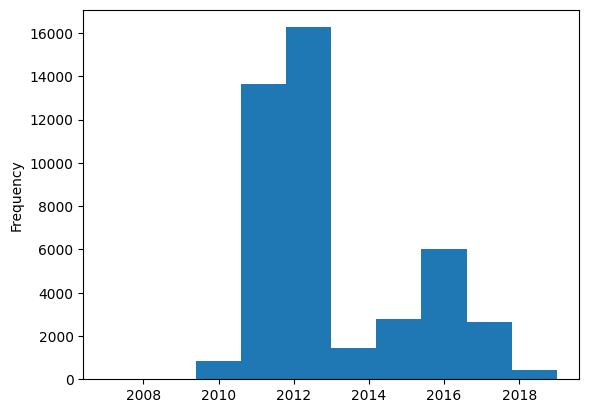

In [18]:
df['year'].plot(kind='hist')
plt.show()

In [19]:
df[['usage']].value_counts().sort_index()

usage       
Casual          34397
Ethnic           3208
Formal           2345
Home                1
Party              29
Smart Casual       67
Sports           4004
Travel             26
Name: count, dtype: int64

In [20]:
images = os.listdir("/kaggle/input/fashion-product-images-small/images")

In [21]:
df['image_found'] = df['id'].apply(lambda x: f"{x}.jpg" in images)

In [22]:
df['image_found'].value_counts()

image_found
True     44072
False        5
Name: count, dtype: int64

In [23]:
df.loc[df['image_found'] == False, 'image_found'] = np.nan
df.dropna(inplace=True)

/tmp/ipykernel_34/4186233108.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['image_found'] == False, 'image_found'] = np.nan


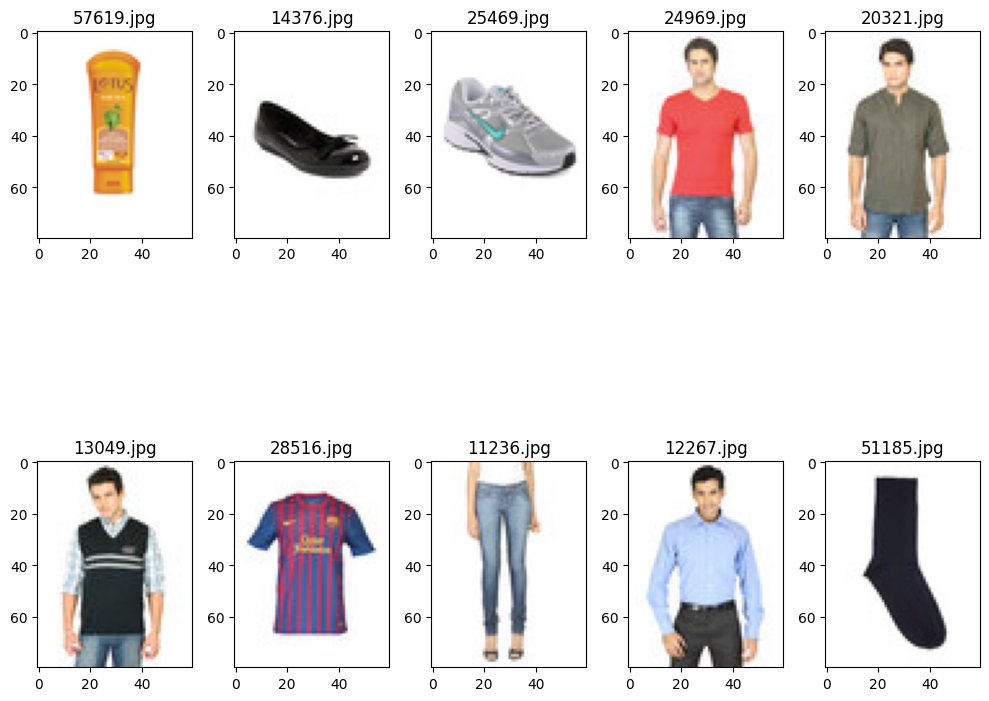

In [24]:
from PIL import Image
input_dir = '/kaggle/input/fashion-product-images-small/images'

test_batch = os.listdir(input_dir)[424:434]
images_test = [Image.open(os.path.join(input_dir, image)) for image in test_batch]

fig, axs = plt.subplots(2, 5, figsize=(10, 10))
axs = axs.ravel()

for i, img in enumerate(images_test):
    axs[i].imshow(img)
    axs[i].set_title(test_batch[i])


plt.tight_layout()
plt.show()


In [25]:
SMALL_DATASET = True

if (SMALL_DATASET):
    df_data = pd.read_csv("/kaggle/input/fashion-product-images-small/styles.csv", on_bad_lines='skip')
    images = os.listdir("/kaggle/input/fashion-product-images-small/images")
else:
    df = pd.read_csv("../input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')
    images = os.listdir("../input/fashion-product-images-dataset/fashion-dataset/images")

In [26]:
if (SMALL_DATASET):
    df['filename'] = df['id'].apply(lambda x: os.path.join("/kaggle/input/fashion-product-images-small/images",str(x)+".jpg"))
else:
    df['filename'] = df['id'].apply(lambda x: os.path.join("../input/fashion-product-images-dataset/fashion-dataset/images/",str(x)+".jpg"))

In [27]:
df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName image_found  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt        True   
1  2012.0  Casual             Peter England Men Party Blue Jeans        True   
2  2016.0  Casual                       Titan Women Silver Watch        True   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants        True   
4  2012.0  Casual                          Puma Men Grey T-shirt        True   

                                            filename  
0  /kaggle/input/fashion-product-images-small/ima...  
1  /kaggle/input/fashion-product-images-small/ima...  
2  /kaggle/input/fashion-product-images-small/ima...  
3  /kaggle/input/fashion-product-images-small/ima...  
4  /kaggle/input/fashion-product-images-small/ima...

In [28]:
df_sample = df.sample(n=5000, random_state=0)
df_sample.head()

id gender masterCategory subCategory   articleType baseColour  \
8072   24543  Women        Apparel     Topwear          Tops      Beige   
40447  26126    Men        Apparel     Topwear        Shirts      White   
15685  20150    Men        Apparel     Topwear        Shirts      Black   
27481  12996   Boys       Footwear       Shoes  Casual Shoes      Brown   
23015  22594    Men        Apparel     Topwear       Tshirts  Navy Blue   

       season    year   usage                       productDisplayName  \
8072     Fall  2011.0  Ethnic     Mother Earth Women Beige Printed Top   
40447  Summer  2012.0  Formal      John Miller Men Striped White Shirt   
15685    Fall  2011.0  Casual        Wrangler Men Stampede Black Shirt   
27481    Fall  2011.0  Casual  Timberland Kids Boys Brown Casual Shoes   
23015    Fall  2011.0  Sports               Nike Men Navy Blue T-shirt   

      image_found                                           filename  
8072         True  /kaggle/input/fashion-product-images-small/ima...  
40447        True  /kaggle/input/fashion-product-images-small/ima...  
15685        True  /kaggle/input/fashion-product-images-small/ima...  
27481        True  /kaggle/input/fashion-product-images-small/ima...  
23015        True  /kaggle/input/fashion-product-images-small/ima...

In [29]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

image_path = df['filename'][1]
image = load_img(image_path)
image = img_to_array(image)
image.shape

2024-03-19 19:27:31.980615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 19:27:31.980712: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 19:27:32.147388: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(80, 60, 3)

In [30]:
if (SMALL_DATASET):
    IMAGE_WIDTH = 60
    IMAGE_HEIGHT = 60
else:
    IMAGE_WIDTH = 100
    IMAGE_HEIGHT = 100

In [31]:
def process_image(image_path):
    image = load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))
    image = img_to_array(image)
    return image

In [32]:
def append_images(column):
    images = []
    for file_path in column:
        images.append(process_image(file_path))
    return np.array(images)

In [33]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

output_lables = ["gender","masterCategory","subCategory","articleType","baseColour","season","usage"]
(X_filepath_train, X_filepath_test,
 y_train,y_test) = train_test_split(df_sample["filename"],df_sample[output_lables],
                                                    test_size=0.2, random_state=21)

In [34]:
X_train = append_images(X_filepath_train)
X_test = append_images(X_filepath_test)

y_train.head()

gender masterCategory subCategory articleType baseColour  season  \
39717   Women       Footwear       Shoes       Heels     Silver  Winter   
15624     Men        Apparel     Topwear      Shirts     Purple    Fall   
26766  Unisex    Accessories        Bags   Backpacks      Black  Summer   
36607   Women        Apparel     Topwear      Kurtas      Brown    Fall   
9825    Women    Accessories       Socks       Socks       Grey  Summer   

        usage  
39717  Casual  
15624  Casual  
26766  Casual  
36607  Ethnic  
9825   Casual

In [35]:
y_test.head()

gender masterCategory subCategory   articleType baseColour  season  \
32227    Men        Apparel     Topwear        Kurtas      Olive  Summer   
16426    Men       Footwear       Shoes  Casual Shoes      Brown    Fall   
1458     Men    Accessories     Watches       Watches      Black  Winter   
43808    Men       Footwear       Shoes  Casual Shoes  Navy Blue    Fall   
12081  Women    Accessories        Bags      Handbags       Pink  Winter   

        usage  
32227  Ethnic  
16426  Casual  
1458   Casual  
43808  Casual  
12081  Casual

In [36]:
lable_encoders = {}
data_train = {}
data_test = {}

for lable in output_lables:
    lable_encoder = LabelBinarizer()
    encoded_data_train = lable_encoder.fit_transform(y_train[lable].to_numpy())
    encoded_data_test = lable_encoder.transform(y_test[lable].to_numpy())

    lable_encoders[lable] = lable_encoder
    data_train[lable] = encoded_data_train
    data_test[lable] = encoded_data_test

# ResNet

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense,BatchNormalization, MaxPooling2D, Conv2D, Activation, Input, Flatten, Dropout, ReLU)

from keras.applications.resnet50 import ResNet50

In [56]:
img_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
img_inputs = Input(shape=img_shape)
x = ResNet50(weights='imagenet',input_shape=img_shape, include_top=False,input_tensor=img_inputs)
x.trainable = False

In [57]:
x = x.output

#x = Flatten()(x)
#x = Dense(1024, activation='relu')(x)

In [58]:
def make_branch(res_input, n_out, name):
    x = Flatten()(res_input)
    x = Dense(1024, activation='relu')(x)
    #x = Dropout(0.15)(x)
    x = Dense(512, activation='relu')(x)
    #x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(n_out)(x)
    x = Activation("softmax",name=name)(x)
    return x

def make_branch_second(res_input, n_out, name):
    x = Flatten()(res_input)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.15)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    #x = ReLU()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    #x = BatchNormalization()(x)
    x = Dense(n_out)(x)
    x = Activation("softmax",name=name)(x)
    return x

In [59]:
branches = {}

#for lable in output_lables:
 #   branches[lable] = make_branch(x, len(lable_encoders[lable].classes_),lable)
    #print(lable)

branches['gender'] = make_branch(x, len(lable_encoders['gender'].classes_),'gender')
branches['masterCategory'] = make_branch(x, len(lable_encoders['masterCategory'].classes_),'masterCategory')
branches['subCategory'] = make_branch(x, len(lable_encoders['subCategory'].classes_),'subCategory')
branches['articleType'] = make_branch(x, len(lable_encoders['articleType'].classes_),'articleType')
branches['baseColour'] = make_branch_second(x, len(lable_encoders['baseColour'].classes_),'baseColour')
branches['season'] = make_branch(x, len(lable_encoders['season'].classes_),'season')
branches['usage'] = make_branch(x, len(lable_encoders['usage'].classes_),'usage')


model = Model(inputs=img_inputs,outputs=branches)

In [74]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 60, 60, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 66, 66, 3) │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 30, 30,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 30, 30,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 30, 30,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 32, 32,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 15, 15,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 15, 15,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 15, 15,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 15, 15,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 15, 15,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 15, 15,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 15, 15,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 15, 15,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 15, 15,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 15, 15,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 15, 15,    │      1,024 │ conv2_block1_3_c

 Total params: 214,332,548 (817.61 MB)

 Trainable params: 63,580,758 (242.54 MB)

 Non-trainable params: 23,590,272 (89.99 MB)

 Optimizer params: 127,161,518 (485.08 MB)

In [75]:
keras.utils.plot_model(model)

In [60]:
optimizer = keras.optimizers.Adam(learning_rate=0.00002)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy'])

In [61]:
EPOCHS=70
history = model.fit(
    X_train,
    data_train,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/70
  4/125 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - articleType_accuracy: 0.0345 - baseColour_accuracy: 0.0176 - gender_accuracy: 0.1810 - loss: 22.3748 - masterCategory_accuracy: 0.2148 - season_accuracy: 0.2259 - subCategory_accuracy: 0.0247 - usage_accuracy: 0.1602      

W0000 00:00:1710878704.322060     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - articleType_accuracy: 0.0783 - baseColour_accuracy: 0.0632 - gender_accuracy: 0.2854 - loss: 18.8311 - masterCategory_accuracy: 0.5393 - season_accuracy: 0.3154 - subCategory_accuracy: 0.2612 - usage_accuracy: 0.1922
Epoch 2/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - articleType_accuracy: 0.3795 - baseColour_accuracy: 0.2305 - gender_accuracy: 0.5515 - loss: 12.9039 - masterCategory_accuracy: 0.8714 - season_accuracy: 0.4529 - subCategory_accuracy: 0.6707 - usage_accuracy: 0.3520
Epoch 3/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - articleType_accuracy: 0.4795 - baseColour_accuracy: 0.3177 - gender_accuracy: 0.6687 - loss: 10.7228 - masterCategory_accuracy: 0.9191 - season_accuracy: 0.5190 - subCategory_accuracy: 0.7724 - usage_accuracy: 0.4199
Epoch 4/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - articleType_accuracy: 0.5949 - baseColour_accuracy: 0.3645 - gender_accuracy: 0.7529 - loss: 9.1870 - masterCategory_accuracy: 0.9523 - sea

<Axes: >

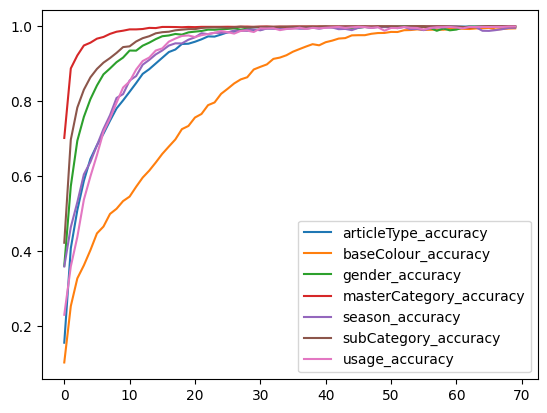

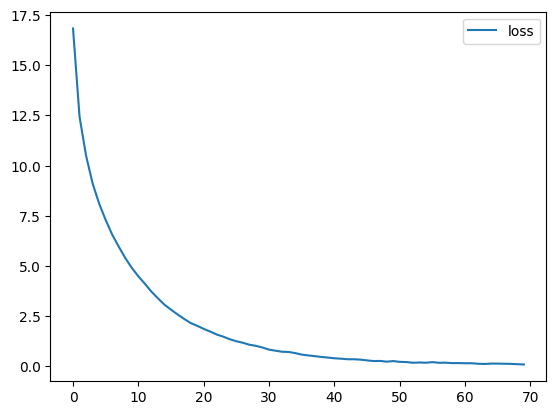

In [62]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,[col for col in history_df.columns if 'accuracy' in col and 'val' not in col]].plot()
history_df.loc[:,[col for col in history_df.columns if 'loss' in col and 'val' not in col]].plot()

In [73]:
model.save('resnet50_tl_deeper_model_4.keras')

In [63]:
from sklearn.metrics import accuracy_score

predictions = {}
accuracies = {}

outputs = model.predict(X_test)

for lable in output_lables:
    predictions[lable] = lable_encoders[lable].classes_[outputs[lable].argmax(axis=1)]

for lable in output_lables:
    accuracies[lable] = accuracy_score(y_test[lable],predictions[lable])

for lable in output_lables:
    print(
        "The accuracy of this model is {:.2f}% for the lable {}.".format(accuracies[lable]*100,lable)
    )

10/32 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

W0000 00:00:1710880489.843855     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step
The accuracy of this model is 82.90% for the lable gender.
The accuracy of this model is 96.70% for the lable masterCategory.
The accuracy of this model is 90.30% for the lable subCategory.
The accuracy of this model is 71.40% for the lable articleType.
The accuracy of this model is 49.00% for the lable baseColour.
The accuracy of this model is 61.50% for the lable season.
The accuracy of this model is 86.80% for the lable usage.


W0000 00:00:1710880495.545934     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [71]:
import random

image_path = X_filepath_test.sample().values[0]
input_image = np.expand_dims(process_image(image_path), axis=0)

output = model.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


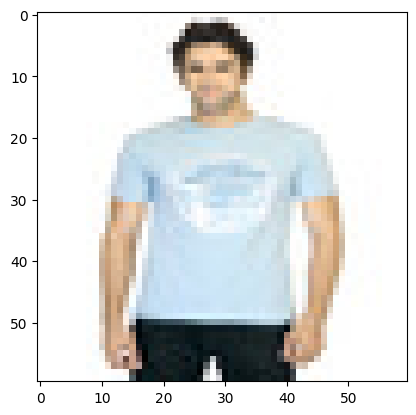

This items gender is most likely Men. With a 99.95 percent confidence.
This items masterCategory is most likely Apparel. With a 99.99 percent confidence.
This items subCategory is most likely Topwear. With a 99.99 percent confidence.
This items articleType is most likely Tshirts. With a 74.63 percent confidence.
This items baseColour is most likely White. With a 54.05 percent confidence.
This items season is most likely Summer. With a 98.48 percent confidence.
This items usage is most likely Casual. With a 99.86 percent confidence.


In [72]:
for lable in output_lables:
    output[lable] = output[lable][0]

image = load_img(image_path, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(image, interpolation='nearest')
plt.show()
for lable in output_lables:
    print(
        "This items {} is most likely {}. With a {:.2f} percent confidence."
        .format(lable,lable_encoders[lable].classes_[output[lable].argmax()], 100 * output[lable].max())
    )

# InceptionV3 (didn't work out)



In [ ]:
if (SMALL_DATASET):
    IMAGE_WIDTH = 75
    IMAGE_HEIGHT = 75
else:
    IMAGE_WIDTH = 100
    IMAGE_HEIGHT = 100

In [ ]:
def process_image(image_path):
    image = load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))
    image = img_to_array(image)
    return image

In [ ]:
def append_images(column):
    images = []
    for file_path in column:
        images.append(process_image(file_path))
    return np.array(images)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

output_lables = ["gender","masterCategory","subCategory","articleType","baseColour","season","usage"]
(X_filepath_train, X_filepath_test,
 y_train,y_test) = train_test_split(df_sample["filename"],df_sample[output_lables],
                                                    test_size=0.2, random_state=21)

In [ ]:
X_train = append_images(X_filepath_train)
X_test = append_images(X_filepath_test)

y_train.head()

gender masterCategory subCategory articleType baseColour  season  \
39717   Women       Footwear       Shoes       Heels     Silver  Winter   
15624     Men        Apparel     Topwear      Shirts     Purple    Fall   
26766  Unisex    Accessories        Bags   Backpacks      Black  Summer   
36607   Women        Apparel     Topwear      Kurtas      Brown    Fall   
9825    Women    Accessories       Socks       Socks       Grey  Summer   

        usage  
39717  Casual  
15624  Casual  
26766  Casual  
36607  Ethnic  
9825   Casual

In [ ]:
y_test.head()

gender masterCategory subCategory   articleType baseColour  season  \
32227    Men        Apparel     Topwear        Kurtas      Olive  Summer   
16426    Men       Footwear       Shoes  Casual Shoes      Brown    Fall   
1458     Men    Accessories     Watches       Watches      Black  Winter   
43808    Men       Footwear       Shoes  Casual Shoes  Navy Blue    Fall   
12081  Women    Accessories        Bags      Handbags       Pink  Winter   

        usage  
32227  Ethnic  
16426  Casual  
1458   Casual  
43808  Casual  
12081  Casual

In [ ]:
lable_encoders = {}
data_train = {}
data_test = {}

for lable in output_lables:
    lable_encoder = LabelBinarizer()
    encoded_data_train = lable_encoder.fit_transform(y_train[lable].to_numpy())
    encoded_data_test = lable_encoder.transform(y_test[lable].to_numpy())

    lable_encoders[lable] = lable_encoder
    data_train[lable] = encoded_data_train
    data_test[lable] = encoded_data_test

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense,BatchNormalization, MaxPooling2D, Conv2D, Activation, Input, Flatten, Dropout)

from keras.applications import InceptionV3

In [ ]:
img_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
img_inputs = Input(shape=img_shape)
x_inc = InceptionV3(weights='imagenet',input_shape=img_shape, include_top=False,input_tensor=img_inputs)
x_inc.trainable = False

In [ ]:
x_inc = x_inc.output

x_inc = Flatten()(x_inc)

def make_branch(res_input, n_out, name):
    x_inc = Dense(256, activation='relu')(res_input)
    x_inc = Dropout(0.2)(x_inc)
    x_inc = Dense(128, activation='relu')(x_inc)
    x_inc = BatchNormalization()(x_inc)
    x_inc = Dense(n_out)(x_inc)
    x_inc = Activation("softmax",name=name)(x_inc)
    return x_inc

branches = {}

for lable in output_lables:
    branches[lable] = make_branch(x_inc, len(lable_encoders[lable].classes_),lable)

model = Model(inputs=img_inputs,outputs=branches)

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [ ]:
EPOCHS=40
history = model.fit(
    X_train,
    data_train,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/40

125/125 [==============================] - 50s 301ms/step - loss: 14.8406 - articleType_loss: 3.7076 - baseColour_loss: 3.4761 - gender_loss: 1.3546 - masterCategory_loss: 1.0565 - season_loss: 1.4181 - subCategory_loss: 2.3130 - usage_loss: 1.5147 - articleType_accuracy: 0.2015 - baseColour_accuracy: 0.2015 - gender_accuracy: 0.4755 - masterCategory_accuracy: 0.6635 - season_accuracy: 0.3650 - subCategory_accuracy: 0.4572 - usage_accuracy: 0.5117

Epoch 2/40

125/125 [==============================] - 37s 295ms/step - loss: 10.7814 - articleType_loss: 2.7329 - baseColour_loss: 2.8310 - gender_loss: 0.9866 - masterCategory_loss: 0.7577 - season_loss: 1.1836 - subCategory_loss: 1.4752 - usage_loss: 0.8144 - articleType_accuracy: 0.3248 - baseColour_accuracy: 0.2882 - gender_accuracy: 0.5960 - masterCategory_accuracy: 0.7250 - season_accuracy: 0.4627 - subCategory_accuracy: 0.6223 - usage_accuracy: 0.7728

Epoch 3/40

125/125 [==============================] - 37s 296ms/step 

<Axes: >

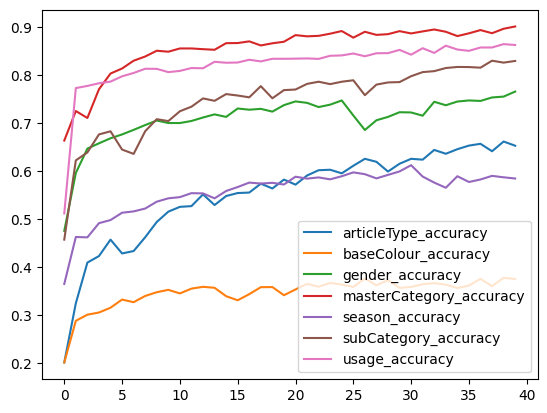

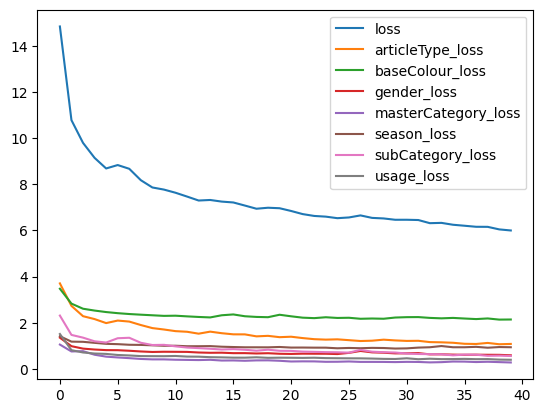

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,[col for col in history_df.columns if 'accuracy' in col and 'val' not in col]].plot()
history_df.loc[:,[col for col in history_df.columns if 'loss' in col and 'val' not in col]].plot()

# VGG16

In [263]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense,BatchNormalization, MaxPooling2D, Conv2D, Activation, Input, Flatten, Dropout)

from keras.applications import VGG16

In [277]:
img_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
img_inputs = Input(shape=img_shape)
x = VGG16(weights='imagenet',input_shape=img_shape, include_top=False,input_tensor=img_inputs)
x.trainable = False

In [278]:
x = x.output

''' x = Flatten()(x)
x = Dense(1024, activation='relu')(x) '''

" x = Flatten()(x)\nx = Dense(1024, activation='relu')(x) "

In [279]:
def make_branch(res_input, n_out, name):
    x = Flatten()(res_input)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.15)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    x = Dense(n_out)(x)
    x = Activation("softmax",name=name)(x)
    return x

def make_branch_second(res_input, n_out, name):
    x = Conv2D(60, 1, activation='relu')(res_input)
    x = Flatten()(res_input)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(n_out)(x)
    x = Activation("softmax",name=name)(x)
    return x

In [280]:
branches = {}

#for lable in output_lables:
 #   branches[lable] = make_branch(x, len(lable_encoders[lable].classes_),lable)
    #print(lable)

branches['gender'] = make_branch(x, len(lable_encoders['gender'].classes_),'gender')
branches['masterCategory'] = make_branch(x, len(lable_encoders['masterCategory'].classes_),'masterCategory')
branches['subCategory'] = make_branch(x, len(lable_encoders['subCategory'].classes_),'subCategory')
branches['articleType'] = make_branch(x, len(lable_encoders['articleType'].classes_),'articleType')
branches['baseColour'] = make_branch_second(x, len(lable_encoders['baseColour'].classes_),'baseColour')
branches['season'] = make_branch(x, len(lable_encoders['season'].classes_),'season')
branches['usage'] = make_branch(x, len(lable_encoders['usage'].classes_),'usage')


model = Model(inputs=img_inputs,outputs=branches)

In [281]:
model.summary()

Model: "model_33"

__________________________________________________________________________________________________

 Layer (type)                Output Shape                 Param #   Connected to                  


 input_27 (InputLayer)       [(None, 60, 60, 3)]          0         []                            

                                                                                                  

 block1_conv1 (Conv2D)       (None, 60, 60, 64)           1792      ['input_27[0][0]']            

                                                                                                  

 block1_conv2 (Conv2D)       (None, 60, 60, 64)           36928     ['block1_conv1[0][0]']        

                                                                                                  

 block1_pool (MaxPooling2D)  (None, 30, 30, 64)           0         ['block1_conv2[0][0]']        

                                                                                

In [282]:
keras.utils.plot_model(x)

AttributeError: 'KerasTensor' object has no attribute 'built'

In [283]:
optimizer = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics="accuracy")

In [284]:
EPOCHS=60
history = model.fit(
    X_train,
    data_train,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/60

125/125 [==============================] - 14s 22ms/step - loss: 12.5569 - articleType_loss: 2.7302 - baseColour_loss: 3.4169 - gender_loss: 1.2414 - masterCategory_loss: 0.5315 - season_loss: 1.4183 - subCategory_loss: 1.4136 - usage_loss: 1.8050 - articleType_accuracy: 0.4110 - baseColour_accuracy: 0.2208 - gender_accuracy: 0.5907 - masterCategory_accuracy: 0.8475 - season_accuracy: 0.4245 - subCategory_accuracy: 0.6735 - usage_accuracy: 0.4347

Epoch 2/60

125/125 [==============================] - 3s 21ms/step - loss: 7.7988 - articleType_loss: 1.5873 - baseColour_loss: 2.4161 - gender_loss: 0.7764 - masterCategory_loss: 0.2440 - season_loss: 1.0590 - subCategory_loss: 0.6810 - usage_loss: 1.0351 - articleType_accuracy: 0.6018 - baseColour_accuracy: 0.3940 - gender_accuracy: 0.7420 - masterCategory_accuracy: 0.9300 - season_accuracy: 0.5623 - subCategory_accuracy: 0.8265 - usage_accuracy: 0.6920

Epoch 3/60

125/125 [==============================] - 3s 21ms/step - loss

<Axes: >

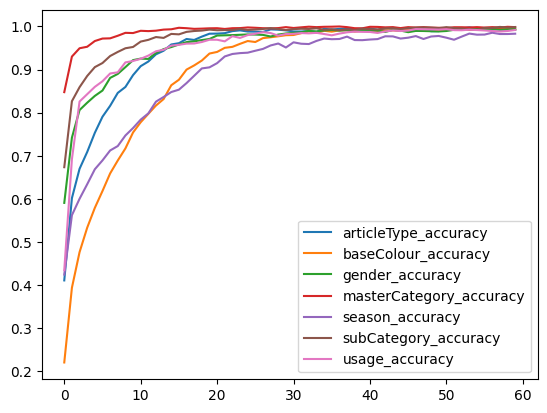

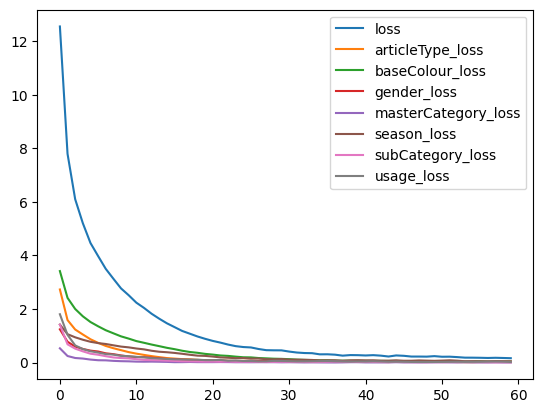

In [285]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,[col for col in history_df.columns if 'accuracy' in col and 'val' not in col]].plot()
history_df.loc[:,[col for col in history_df.columns if 'loss' in col and 'val' not in col]].plot()

In [ ]:
model.save('vgg16_tl_deeper_model_4.keras')

In [286]:
from sklearn.metrics import accuracy_score

predictions = {}
accuracies = {}

outputs = model.predict(X_test)

for lable in output_lables:
    predictions[lable] = lable_encoders[lable].classes_[outputs[lable].argmax(axis=1)]

for lable in output_lables:
    accuracies[lable] = accuracy_score(y_test[lable],predictions[lable])

for lable in output_lables:
    print(
        "The accuracy of this model is {:.2f}% for the lable {}.".format(accuracies[lable]*100,lable)
    )

32/32 [==============================] - 1s 16ms/step

The accuracy of this model is 84.30% for the lable gender.

The accuracy of this model is 94.00% for the lable masterCategory.

The accuracy of this model is 86.00% for the lable subCategory.

The accuracy of this model is 64.60% for the lable articleType.

The accuracy of this model is 35.70% for the lable baseColour.

The accuracy of this model is 57.50% for the lable season.

The accuracy of this model is 85.50% for the lable usage.


In [ ]:
import random

image_path = X_filepath_test.sample().values[0]
input_image = np.expand_dims(process_image(image_path), axis=0)

output = model.predict(input_image)

1/1 [==============================] - 0s 26ms/step


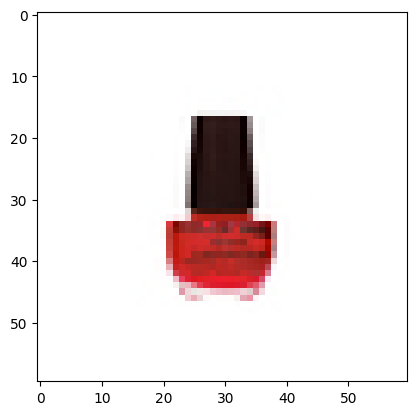

This items gender is most likely Women. With a 99.91 percent confidence.

This items masterCategory is most likely Personal Care. With a 100.00 percent confidence.

This items subCategory is most likely Nails. With a 99.98 percent confidence.

This items articleType is most likely Nail Polish. With a 99.88 percent confidence.

This items baseColour is most likely Orange. With a 99.89 percent confidence.

This items season is most likely Spring. With a 99.96 percent confidence.

This items usage is most likely Casual. With a 99.98 percent confidence.


In [ ]:
for lable in output_lables:
    output[lable] = output[lable][0]

image = load_img(image_path, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(image, interpolation='nearest')
plt.show()
for lable in output_lables:
    print(
        "This items {} is most likely {}. With a {:.2f} percent confidence."
        .format(lable,lable_encoders[lable].classes_[output[lable].argmax()], 100 * output[lable].max())
    )